In [1]:
!pip install py7zr
import py7zr

with py7zr.SevenZipFile('final_data.7z', mode='r') as z:
    z.extractall(path="<output path>")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 37.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

%load_ext autoreload
%autoreload 2

In [3]:
data_dir = "<output path>/final_data/"

attendance_file = "attendance.csv"
entity_file = "entity_schedule.csv"
link_attraction_file = "link_attraction_park.csv"
parade_file = "parade_night_show.xlsx"
waiting_file = "waiting_times.csv"
weather_file = "weather_data.csv"

In [4]:
attendance = pd.read_csv(os.path.join(data_dir, attendance_file))
schedule = pd.read_csv(os.path.join(data_dir, entity_file))
link_attraction = pd.read_csv(os.path.join(data_dir, link_attraction_file), sep=";")
parade = pd.read_excel(os.path.join(data_dir, parade_file))
waiting = pd.read_csv(os.path.join(data_dir, waiting_file))
weather = pd.read_csv(os.path.join(data_dir, weather_file))

1. Attendance clean

In [5]:
attendance.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365


In [6]:
attendance["USAGE_DATE"] = pd.to_datetime(attendance["USAGE_DATE"], format="%Y-%m-%d")
attendance = attendance[attendance["FACILITY_NAME"] == "PortAventura World"]
attendance = attendance[attendance['attendance']>0]
attendance

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
2,2018-06-02,PortAventura World,57940
4,2018-06-03,PortAventura World,44365
6,2018-06-04,PortAventura World,37617
8,2018-06-05,PortAventura World,32438
...,...,...,...
2357,2022-07-22,PortAventura World,49586
2359,2022-07-23,PortAventura World,51748
2361,2022-07-24,PortAventura World,45261
2363,2022-07-25,PortAventura World,53764


2. Schedule clean

In [7]:
schedule.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29


In [8]:
schedule = schedule.merge(
    link_attraction,
    how="left",
    left_on="ENTITY_DESCRIPTION_SHORT",
    right_on="ATTRACTION",
).drop(columns=["ATTRACTION"])
schedule = schedule[schedule["ENTITY_DESCRIPTION_SHORT"] != "Tivoli Gardens"]
schedule = schedule[schedule["PARK"] != "Tivoli Gardens"]
schedule['WORK_DATE'] = pd.to_datetime(schedule['WORK_DATE'])
schedule.sort_values(by="WORK_DATE")


,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,PARK
3607,NaN,Inverted Coaster,ATTR,2018-01-01 09:43:00.000,2018-01-01 17:00:00.000,2018-01-02 07:52:37.000,2018-01-01,PortAventura World
30716,NaN,Swing Ride,ATTR,2018-01-01 08:30:00.000,2018-01-01 21:14:00.000,2018-01-02 07:50:30.000,2018-01-01,PortAventura World
10094,NaN,PortAventura World,PARK,2018-01-01 08:30:00.000,2018-01-01 09:30:00.000,2018-01-02 07:57:06.000,2018-01-01,NaN
19506,NaN,Superman Ride,ATTR,2018-01-01 09:37:00.000,2018-01-01 17:00:00.000,2018-01-02 07:52:37.000,2018-01-01,PortAventura World
6310,NaN,Kiddie Coaster,ATTR,2018-01-01 10:00:00.000,2018-01-01 17:07:00.000,2018-01-02 07:51:31.000,2018-01-01,PortAventura World
...,...,...,...,...,...,...,...,...
38107,NaN,Haunted House,ATTR,2022-08-22 09:00:00.000,2022-08-22 21:59:00.000,2022-08-23 09:02:38.000,2022-08-22,PortAventura World
38108,NaN,Bungee Jump,ATTR,2022-08-22 09:15:00.000,2022-08-22 23:02:00.000,2022-08-23 08:58:17.000,2022-08-22,PortAventura World
38111,NaN,Drop Tower,ATTR,2022-08-22 08:30:00.000,2022-08-22 22:22:00.000,2022-08-23 09:02:38.000,2022-08-22,PortAventura World
38077,NaN,Vertical Drop,ATTR,2022-08-22 09:22:00.000,2022-08-22 22:43:00.000,2022-08-23 08:58:18.000,2022-08-22,PortAventura World


In [9]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25215 entries, 1 to 38306
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REF_CLOSING_DESCRIPTION   2769 non-null   object        
 1   ENTITY_DESCRIPTION_SHORT  25215 non-null  object        
 2   ENTITY_TYPE               25215 non-null  object        
 3   DEB_TIME                  25215 non-null  object        
 4   FIN_TIME                  25215 non-null  object        
 5   UPDATE_TIME               25215 non-null  object        
 6   WORK_DATE                 25215 non-null  datetime64[ns]
 7   PARK                      23351 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.7+ MB


3. Attraction clean

In [10]:
link_attraction.head()

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens


In [11]:
link_attraction=link_attraction[link_attraction["PARK"] == "PortAventura World"]
link_attraction

,ATTRACTION,PARK
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
5,Crazy Dance,PortAventura World
6,Dizzy Dropper,PortAventura World
7,Drop Tower,PortAventura World
8,Flying Coaster,PortAventura World
9,Free Fall,PortAventura World
10,Giant Wheel,PortAventura World
11,Giga Coaster,PortAventura World


4. Parade clean

In [12]:
parade.head()

,Unnamed: 0,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,0,2018-10-01,20:00:00,17:30:00,12:10:00
1,1,2018-10-02,20:00:00,17:30:00,12:10:00
2,2,2018-10-03,20:00:00,17:30:00,12:10:00
3,3,2018-10-04,20:00:00,17:30:00,12:10:00
4,4,2018-10-05,20:00:00,17:30:00,12:10:00


In [13]:
parade.drop(columns=["Unnamed: 0"], inplace=True)

# Columns to adjust
time_columns = ["NIGHT_SHOW", "PARADE_1", "PARADE_2"]

# Update the time columns
for col in time_columns:
    parade[col] = pd.to_datetime(parade[col], format="%H:%M:%S").dt.time  # Extract time
    parade[col] = parade["WORK_DATE"] + pd.to_timedelta(
        parade[col].astype(str)
    )  # Combine WORK_DATE with time

# Ensure the final format is datetime
parade[time_columns] = parade[time_columns].apply(pd.to_datetime)
parade

,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-10-01,2018-10-01 20:00:00,2018-10-01 17:30:00,2018-10-01 12:10:00
1,2018-10-02,2018-10-02 20:00:00,2018-10-02 17:30:00,2018-10-02 12:10:00
2,2018-10-03,2018-10-03 20:00:00,2018-10-03 17:30:00,2018-10-03 12:10:00
3,2018-10-04,2018-10-04 20:00:00,2018-10-04 17:30:00,2018-10-04 12:10:00
4,2018-10-05,2018-10-05 20:00:00,2018-10-05 17:30:00,2018-10-05 12:10:00
...,...,...,...,...
666,2022-08-14,2022-08-14 23:00:00,2022-08-14 17:30:00,NaT
667,2022-08-15,2022-08-15 23:00:00,2022-08-15 17:30:00,NaT
668,2022-08-16,2022-08-16 23:00:00,2022-08-16 17:30:00,NaT
669,2022-08-17,2022-08-17 23:00:00,2022-08-17 17:30:00,NaT


5. Waiting clean

In [14]:
waiting["WORK_DATE"] = pd.to_datetime(waiting["WORK_DATE"], format="%Y-%m-%d")
waiting["FIN_TIME"] = pd.to_datetime(waiting["FIN_TIME"], format="%Y-%m-%d %H:%M:%S.%f")
waiting["DEB_TIME"] = pd.to_datetime(waiting["DEB_TIME"], format="%Y-%m-%d %H:%M:%S.%f")
waiting.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [15]:
waiting = waiting.merge(
    link_attraction,
    how="left",
    left_on="ENTITY_DESCRIPTION_SHORT",
    right_on="ATTRACTION",
).drop(columns=["ATTRACTION"])
waiting = waiting[waiting["PARK"] == "PortAventura World"]
waiting

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,PARK
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,PortAventura World
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,PortAventura World
5,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,0,0,0,3.0,PortAventura World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World
3509320,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World
3509321,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World
3509322,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0,PortAventura World


6. Weather clean

In [16]:
weather.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,915148800,1999-01-01 00:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,...,NaN,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n
1,915152400,1999-01-01 01:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,3.54,5.18,...,NaN,NaN,NaN,NaN,NaN,6,800,Clear,sky is clear,01n
2,915156000,1999-01-01 02:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,4.11,5.38,...,NaN,NaN,NaN,NaN,NaN,14,801,Clouds,few clouds,02n
3,915159600,1999-01-01 03:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,7.31,NaN,3.73,4.42,...,NaN,NaN,NaN,NaN,NaN,39,802,Clouds,scattered clouds,03n
4,915163200,1999-01-01 04:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.91,NaN,3.53,4.00,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n


In [17]:
weather['dt_iso'] = weather['dt_iso']
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'].str.slice(0,13), format='%Y-%m-%d %H')
weather = weather[weather['timezone'] == 3600]
weather['dt_iso+1'] = weather['dt_iso'].apply(lambda row: row + pd.Timedelta(hours=1))
weather['QUARTER'] = weather.apply(lambda row: pd.date_range(row['dt_iso'], row['dt_iso+1'], freq='15min'), axis=1)
weather = weather.explode('QUARTER')
weather = weather.drop(columns=['dt_iso', 'dt_iso+1', 'timezone'])
weather = weather.rename(columns={'QUARTER': 'date'})
weather = weather.drop_duplicates(subset='date', keep='first')
weather

,dt,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 00:00:00
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 00:15:00
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 00:30:00
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 00:45:00
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203663,1648335600,Custom location,48.873492,2.295104,10.41,NaN,2.27,8.99,8.74,12.88,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2022-03-27 00:00:00
203664,1648339200,Custom location,48.873492,2.295104,9.50,NaN,2.36,7.49,7.74,12.31,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2022-03-27 00:15:00
203664,1648339200,Custom location,48.873492,2.295104,9.50,NaN,2.36,7.49,7.74,12.31,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2022-03-27 00:30:00
203664,1648339200,Custom location,48.873492,2.295104,9.50,NaN,2.36,7.49,7.74,12.31,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2022-03-27 00:45:00


7. Closing time extranction

In [18]:
closing = pd.read_csv(os.path.join(data_dir, entity_file))
closing = closing[closing["ENTITY_DESCRIPTION_SHORT"] != "Tivoli Gardens"]
closing = closing.merge(
    link_attraction,
    how="left",
    left_on="ENTITY_DESCRIPTION_SHORT",
    right_on="ATTRACTION",
).drop(columns=["ATTRACTION"])
closing = closing[closing["PARK"] != "Tivoli Gardens"]
closing.drop(columns=["PARK"], inplace=True)
closing.drop(columns=["UPDATE_TIME"], inplace=True)

closing["DEB_TIME"] = pd.to_datetime(closing["DEB_TIME"])
closing["FIN_TIME"] = pd.to_datetime(closing["FIN_TIME"])
closing["WORK_DATE"] = pd.to_datetime(closing["WORK_DATE"])
closing = closing[closing["ENTITY_TYPE"] == "PARK"]

closing.sort_values(by="WORK_DATE")


,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,WORK_DATE
9194,NaN,PortAventura World,PARK,2018-01-01 10:00:00,2018-01-01 22:00:00,2018-01-01
9584,NaN,PortAventura World,PARK,2018-01-01 08:30:00,2018-01-01 09:30:00,2018-01-01
8777,NaN,PortAventura World,PARK,2018-01-02 09:00:00,2018-01-02 22:00:00,2018-01-02
10065,NaN,PortAventura World,PARK,2018-01-02 08:00:00,2018-01-02 09:00:00,2018-01-02
23702,NaN,PortAventura World,PARK,2018-01-03 09:00:00,2018-01-03 22:00:00,2018-01-03
...,...,...,...,...,...,...
36336,NaN,PortAventura World,PARK,2022-08-20 09:30:00,2022-08-20 23:00:00,2022-08-20
36240,NaN,PortAventura World,PARK,2022-08-21 09:30:00,2022-08-21 23:00:00,2022-08-21
22559,NaN,PortAventura World,PARK,2022-08-21 08:30:00,2022-08-21 09:30:00,2022-08-21
36217,NaN,PortAventura World,PARK,2022-08-22 09:30:00,2022-08-22 23:00:00,2022-08-22


In [19]:

closing["TIME CLOSED"] = (
    closing["FIN_TIME"] - closing["DEB_TIME"]
).dt.total_seconds() / 3600
closing.sort_values(by="WORK_DATE")


<ipython-input-19-ee491634b92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing["TIME CLOSED"] = (


,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,WORK_DATE,TIME CLOSED
9194,NaN,PortAventura World,PARK,2018-01-01 10:00:00,2018-01-01 22:00:00,2018-01-01,12.0
9584,NaN,PortAventura World,PARK,2018-01-01 08:30:00,2018-01-01 09:30:00,2018-01-01,1.0
8777,NaN,PortAventura World,PARK,2018-01-02 09:00:00,2018-01-02 22:00:00,2018-01-02,13.0
10065,NaN,PortAventura World,PARK,2018-01-02 08:00:00,2018-01-02 09:00:00,2018-01-02,1.0
23702,NaN,PortAventura World,PARK,2018-01-03 09:00:00,2018-01-03 22:00:00,2018-01-03,13.0
...,...,...,...,...,...,...,...
36336,NaN,PortAventura World,PARK,2022-08-20 09:30:00,2022-08-20 23:00:00,2022-08-20,13.5
36240,NaN,PortAventura World,PARK,2022-08-21 09:30:00,2022-08-21 23:00:00,2022-08-21,13.5
22559,NaN,PortAventura World,PARK,2022-08-21 08:30:00,2022-08-21 09:30:00,2022-08-21,1.0
36217,NaN,PortAventura World,PARK,2022-08-22 09:30:00,2022-08-22 23:00:00,2022-08-22,13.5


In [20]:
unique_closing = closing.groupby("WORK_DATE")["TIME CLOSED"].sum().reset_index()
unique_closing["min_DEB_TIME"] = (
    closing.groupby("WORK_DATE")["DEB_TIME"]
    .min()
    .reset_index(name="min_DEB_TIME")["min_DEB_TIME"]
)
unique_closing["max_FIN_TIME"] = (
    closing.groupby("WORK_DATE")["FIN_TIME"]
    .max()
    .reset_index(name="max_FIN_TIME")["max_FIN_TIME"]
)
unique_closing.sort_values(by="TIME CLOSED")
unique_closing

,WORK_DATE,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
0,2018-01-01,13.0,2018-01-01 08:30:00,2018-01-01 22:00:00
1,2018-01-02,14.0,2018-01-02 08:00:00,2018-01-02 22:00:00
2,2018-01-03,14.0,2018-01-03 08:00:00,2018-01-03 22:00:00
3,2018-01-04,14.0,2018-01-04 08:00:00,2018-01-04 22:00:00
4,2018-01-05,14.0,2018-01-05 08:00:00,2018-01-05 22:00:00
...,...,...,...,...
927,2022-08-18,14.5,2022-08-18 08:30:00,2022-08-18 23:00:00
928,2022-08-19,14.5,2022-08-19 08:30:00,2022-08-19 23:00:00
929,2022-08-20,14.5,2022-08-20 08:30:00,2022-08-20 23:00:00
930,2022-08-21,14.5,2022-08-21 08:30:00,2022-08-21 23:00:00


In [21]:
unique_closing["WORK_DATE"] = pd.to_datetime(unique_closing["WORK_DATE"])
attendance["USAGE_DATE"] = pd.to_datetime(attendance["USAGE_DATE"])
df = attendance.merge(
    unique_closing, how="left", left_on="USAGE_DATE", right_on="WORK_DATE"
)
df.sort_values("TIME CLOSED")
df

,USAGE_DATE,FACILITY_NAME,attendance,WORK_DATE,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
0,2018-06-01,PortAventura World,46804,2018-06-01,14.0,2018-06-01 08:30:00,2018-06-01 23:00:00
1,2018-06-02,PortAventura World,57940,2018-06-02,14.0,2018-06-02 08:30:00,2018-06-02 23:00:00
2,2018-06-03,PortAventura World,44365,2018-06-03,14.0,2018-06-03 08:30:00,2018-06-03 23:00:00
3,2018-06-04,PortAventura World,37617,2018-06-04,14.0,2018-06-04 08:30:00,2018-06-04 23:00:00
4,2018-06-05,PortAventura World,32438,2018-06-05,14.0,2018-06-05 08:30:00,2018-06-05 23:00:00
...,...,...,...,...,...,...,...
1140,2022-07-22,PortAventura World,49586,2022-07-22,14.5,2022-07-22 08:30:00,2022-07-22 23:00:00
1141,2022-07-23,PortAventura World,51748,2022-07-23,14.5,2022-07-23 08:30:00,2022-07-23 23:00:00
1142,2022-07-24,PortAventura World,45261,2022-07-24,14.5,2022-07-24 08:30:00,2022-07-24 23:00:00
1143,2022-07-25,PortAventura World,53764,2022-07-25,14.5,2022-07-25 08:30:00,2022-07-25 23:00:00


In [22]:
df.loc[df["attendance"] < 0, "attendance"] = 0
attendance=df
attendance

,USAGE_DATE,FACILITY_NAME,attendance,WORK_DATE,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
0,2018-06-01,PortAventura World,46804,2018-06-01,14.0,2018-06-01 08:30:00,2018-06-01 23:00:00
1,2018-06-02,PortAventura World,57940,2018-06-02,14.0,2018-06-02 08:30:00,2018-06-02 23:00:00
2,2018-06-03,PortAventura World,44365,2018-06-03,14.0,2018-06-03 08:30:00,2018-06-03 23:00:00
3,2018-06-04,PortAventura World,37617,2018-06-04,14.0,2018-06-04 08:30:00,2018-06-04 23:00:00
4,2018-06-05,PortAventura World,32438,2018-06-05,14.0,2018-06-05 08:30:00,2018-06-05 23:00:00
...,...,...,...,...,...,...,...
1140,2022-07-22,PortAventura World,49586,2022-07-22,14.5,2022-07-22 08:30:00,2022-07-22 23:00:00
1141,2022-07-23,PortAventura World,51748,2022-07-23,14.5,2022-07-23 08:30:00,2022-07-23 23:00:00
1142,2022-07-24,PortAventura World,45261,2022-07-24,14.5,2022-07-24 08:30:00,2022-07-24 23:00:00
1143,2022-07-25,PortAventura World,53764,2022-07-25,14.5,2022-07-25 08:30:00,2022-07-25 23:00:00


Removing covid data

In [23]:
attendance['USAGE_DATE'] = pd.to_datetime(attendance['USAGE_DATE'], format="%Y-%m-%d")
attendance_sans_covid = attendance[(attendance['USAGE_DATE'] < pd.Timestamp('2020-03-14')) | (attendance['USAGE_DATE'] > pd.Timestamp('2021-06-30'))]

In [24]:
attendance_sans_covid

,USAGE_DATE,FACILITY_NAME,attendance,WORK_DATE,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
0,2018-06-01,PortAventura World,46804,2018-06-01,14.0,2018-06-01 08:30:00,2018-06-01 23:00:00
1,2018-06-02,PortAventura World,57940,2018-06-02,14.0,2018-06-02 08:30:00,2018-06-02 23:00:00
2,2018-06-03,PortAventura World,44365,2018-06-03,14.0,2018-06-03 08:30:00,2018-06-03 23:00:00
3,2018-06-04,PortAventura World,37617,2018-06-04,14.0,2018-06-04 08:30:00,2018-06-04 23:00:00
4,2018-06-05,PortAventura World,32438,2018-06-05,14.0,2018-06-05 08:30:00,2018-06-05 23:00:00
...,...,...,...,...,...,...,...
1140,2022-07-22,PortAventura World,49586,2022-07-22,14.5,2022-07-22 08:30:00,2022-07-22 23:00:00
1141,2022-07-23,PortAventura World,51748,2022-07-23,14.5,2022-07-23 08:30:00,2022-07-23 23:00:00
1142,2022-07-24,PortAventura World,45261,2022-07-24,14.5,2022-07-24 08:30:00,2022-07-24 23:00:00
1143,2022-07-25,PortAventura World,53764,2022-07-25,14.5,2022-07-25 08:30:00,2022-07-25 23:00:00


In [25]:
attendance = attendance_sans_covid

In [26]:
attendance_df = attendance
entity_df = closing
link_attraction_park_df = link_attraction
parades_df = parade
waiting_time_df = waiting
weather_df = weather

In [27]:
# Converting to date format
# waiting_time_df['FIN_TIME'] = waiting_time_df['FIN_TIME'].str.slice(0,16) # This line is causing the error
waiting_time_df['FIN_TIME'] = pd.to_datetime(waiting_time_df['FIN_TIME'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m-%d %H:%M')
waiting_time_df['FIN_TIME'] = pd.to_datetime(waiting_time_df['FIN_TIME'], format='%Y-%m-%d %H:%M')
# waiting_time_df['DEB_TIME'] = waiting_time_df['DEB_TIME'].str.slice(0,16) # This line could also cause the error
waiting_time_df['DEB_TIME'] = pd.to_datetime(waiting_time_df['DEB_TIME'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m-%d %H:%M')
waiting_time_df['DEB_TIME'] = pd.to_datetime(waiting_time_df['DEB_TIME'], format='%Y-%m-%d %H:%M')

# Merging waiting time and weather data
merge_1 = waiting_time_df.merge(weather_df, left_on='FIN_TIME', right_on='date' , how='left')
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,39.0,802.0,Clouds,scattered clouds,03n,2018-01-01 21:15:00
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,NaN,NaN,NaN,NaN,23.0,801.0,Clouds,few clouds,02n,2018-01-01 19:45:00
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,51.0,803.0,Clouds,broken clouds,04n,2018-01-01 22:45:00
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,0.92,NaN,NaN,NaN,99.0,500.0,Rain,light rain,10d,2018-01-01 13:00:00
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,0.24,NaN,NaN,NaN,67.0,500.0,Rain,light rain,10n,2018-01-01 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [28]:
merge_1 = merge_1.merge(link_attraction_park_df, left_on='ENTITY_DESCRIPTION_SHORT', right_on='ATTRACTION', how='left')
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date,ATTRACTION,PARK_y
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,NaN,NaN,39.0,802.0,Clouds,scattered clouds,03n,2018-01-01 21:15:00,Roller Coaster,PortAventura World
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,NaN,NaN,23.0,801.0,Clouds,few clouds,02n,2018-01-01 19:45:00,Bumper Cars,PortAventura World
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,NaN,NaN,51.0,803.0,Clouds,broken clouds,04n,2018-01-01 22:45:00,Rapids Ride,PortAventura World
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,NaN,NaN,99.0,500.0,Rain,light rain,10d,2018-01-01 13:00:00,Crazy Dance,PortAventura World
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,NaN,NaN,67.0,500.0,Rain,light rain,10n,2018-01-01 18:30:00,Free Fall,PortAventura World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Himalaya Ride,PortAventura World
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Crazy Dance,PortAventura World
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Crazy Dance,PortAventura World
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Giga Coaster,PortAventura World


In [29]:
# Merge merge_1 and attendance data
merge_1 = merge_1.merge(attendance_df, left_on=['PARK_y','WORK_DATE'] , right_on=['FACILITY_NAME', 'USAGE_DATE'], how='left')
merge_1

,WORK_DATE_x,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,date,ATTRACTION,PARK_y,USAGE_DATE,FACILITY_NAME,attendance,WORK_DATE_y,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,2018-01-01 21:15:00,Roller Coaster,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,2018-01-01 19:45:00,Bumper Cars,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,2018-01-01 22:45:00,Rapids Ride,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,2018-01-01 13:00:00,Crazy Dance,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,2018-01-01 18:30:00,Free Fall,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaT,Himalaya Ride,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaT,Crazy Dance,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaT,Crazy Dance,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaT,Giga Coaster,PortAventura World,NaT,NaN,NaN,NaT,NaN,NaT,NaT


In [30]:
import pandas as pd
# Add ending date for Night show and Parade 1 and 2

parades_df = parades_df.rename(columns={'NIGHT_SHOW': 'NIGHT_SHOW_STARTING_HOUR',
                                        'PARADE_1': 'PARADE_1_STARTING_HOUR',
                                        'PARADE_2': 'PARADE_2_STARTING_HOUR'})

# Supposons que parades_df est votre DataFrame et a déjà été défini
parades_df['NIGHT_SHOW_STARTING_HOUR'] = pd.to_datetime(parades_df['NIGHT_SHOW_STARTING_HOUR'], format='%H:%M:%S')
parades_df['PARADE_1_STARTING_HOUR'] = pd.to_datetime(parades_df['PARADE_1_STARTING_HOUR'], format='%H:%M:%S')
parades_df['PARADE_2_STARTING_HOUR'] = pd.to_datetime(parades_df['PARADE_2_STARTING_HOUR'], format='%H:%M:%S')

# Assurez-vous que la colonne WORK_DATE est au format datetime
parades_df['WORK_DATE'] = pd.to_datetime(parades_df['WORK_DATE'])

# Fonction pour combiner les dates et heures tout en gérant les valeurs potentiellement invalides
def combine_date_hour(row, time_col):
    # Extraire les composants de la date
    year, month, day = row['WORK_DATE'].year, row['WORK_DATE'].month, row['WORK_DATE'].day

    # Convertir la colonne d'heure en datetime si ce n'est pas déjà fait
    time_val = pd.to_datetime(row[time_col], errors='coerce', format='%H:%M:%S')

    # Vérifier si time_val est NaT (Not a Time), auquel cas retourner la valeur originale
    if pd.isna(time_val):
        return None  # ou retourner row[time_col] si vous voulez garder l'heure originale

    # Extraire les composants de l'heure
    hour, minute, second = time_val.hour, time_val.minute, time_val.second

    # Créer et retourner le nouveau Timestamp
    return pd.Timestamp(year=year, month=month, day=day, hour=hour, minute=minute, second=second)

# Appliquer la fonction pour chaque colonne d'heure
for col in ['NIGHT_SHOW_STARTING_HOUR', 'PARADE_1_STARTING_HOUR', 'PARADE_2_STARTING_HOUR']:
    parades_df[f'{col}'] = parades_df.apply(combine_date_hour, time_col=col, axis=1)

def adjust_hour(time):
    # Extraire les heures et les minutes
    hour = time.hour
    minute = time.minute

    # Appliquer les conditions spécifiées pour ajuster l'heure
    if hour == 18 and minute == 40:
        return time.replace(minute=30)
    elif hour == 18 and minute == 10:
        return time.replace(minute=0)
    elif hour == 20 and minute == 20:
        return time.replace(minute=30)
    elif hour == 19 and minute == 10:
        return time.replace(minute=0)
    elif hour == 11 and minute == 50:
        return time.replace(hour=12) and time.replace(minute=0)
    elif hour == 12 and minute == 10:
        return time.replace(minute=0)
    elif hour == 10 and minute == 50:
        return time.replace(minute=0) and time.replace(hour=11)
    elif hour == 12 and minute == 25:
        return time.replace(minute=30)
    elif hour == 12 and minute == 55:
        return time.replace(minute=0) and time.replace(hour=13)
    elif hour == 13 and minute == 55:
        return time.replace(minute=0) and time.replace(hour=14)
    else:
        return time


# Appliquer la fonction pour ajuster les heures
parades_df['NIGHT_SHOW_STARTING_HOUR'] = parades_df['NIGHT_SHOW_STARTING_HOUR'].apply(adjust_hour)
parades_df['PARADE_1_STARTING_HOUR'] = parades_df['PARADE_1_STARTING_HOUR'].apply(adjust_hour)
parades_df['PARADE_2_STARTING_HOUR'] = parades_df['PARADE_2_STARTING_HOUR'].apply(adjust_hour)


parades_df['PARADE_1_ENDING_HOUR'] = parades_df['PARADE_1_STARTING_HOUR'] + pd.Timedelta(minutes=30)
parades_df['PARADE_2_ENDING_HOUR'] = parades_df['PARADE_2_STARTING_HOUR'] + pd.Timedelta(minutes=30)
parades_df['NIGHT_SHOW_ENDING_HOUR'] = parades_df['NIGHT_SHOW_STARTING_HOUR'] + pd.Timedelta(minutes=30)

In [31]:
parade_1 = parades_df[['PARADE_1_STARTING_HOUR', 'PARADE_1_ENDING_HOUR']]
parade_1['DATE'] = parade_1.apply(lambda row: pd.date_range(row['PARADE_1_STARTING_HOUR'], row['PARADE_1_ENDING_HOUR'], freq='15min'), axis=1)
parade_1 = parade_1.explode('DATE')
parade_1['IS PARADE 1'] = 1
parade_1 = parade_1.drop(columns=['PARADE_1_STARTING_HOUR', 'PARADE_1_ENDING_HOUR'])
parade_1

<ipython-input-31-7d7c7a08b615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parade_1['DATE'] = parade_1.apply(lambda row: pd.date_range(row['PARADE_1_STARTING_HOUR'], row['PARADE_1_ENDING_HOUR'], freq='15min'), axis=1)


,DATE,IS PARADE 1
0,2018-10-01 17:30:00,1
0,2018-10-01 17:45:00,1
0,2018-10-01 18:00:00,1
1,2018-10-02 17:30:00,1
1,2018-10-02 17:45:00,1
...,...,...
669,2022-08-17 17:45:00,1
669,2022-08-17 18:00:00,1
670,2022-08-18 17:30:00,1
670,2022-08-18 17:45:00,1


In [32]:
parade_2 = parades_df[['PARADE_2_STARTING_HOUR', 'PARADE_2_ENDING_HOUR']]
parade_2 = parade_2.dropna()
parade_2['DATE'] = parade_2.apply(lambda row: pd.date_range(row['PARADE_2_STARTING_HOUR'], row['PARADE_2_ENDING_HOUR'], freq='15min'), axis=1)
parade_2 = parade_2.explode('DATE')
parade_2['IS PARADE 2'] = 1
parade_2 = parade_2.drop(columns=['PARADE_2_STARTING_HOUR', 'PARADE_2_ENDING_HOUR'])
parade_2

,DATE,IS PARADE 2
0,2018-10-01 12:00:00,1
0,2018-10-01 12:15:00,1
0,2018-10-01 12:30:00,1
1,2018-10-02 12:00:00,1
1,2018-10-02 12:15:00,1
...,...,...
461,2020-01-05 12:15:00,1
461,2020-01-05 12:30:00,1
462,2020-01-06 11:30:00,1
462,2020-01-06 11:45:00,1


In [33]:
parades_df_night = parades_df[['NIGHT_SHOW_STARTING_HOUR', 'NIGHT_SHOW_ENDING_HOUR']]
parades_df_night['DATE'] = parades_df_night.apply(lambda row: pd.date_range(row['NIGHT_SHOW_STARTING_HOUR'], row['NIGHT_SHOW_ENDING_HOUR'], freq='15min'), axis=1)
parades_df_night = parades_df_night.explode('DATE')
parades_df_night['IS NIGHT SHOW'] = 1
parades_df_night = parades_df_night.drop(columns=['NIGHT_SHOW_STARTING_HOUR', 'NIGHT_SHOW_ENDING_HOUR'])
parades_df_night

<ipython-input-33-b33b5f4fbb0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parades_df_night['DATE'] = parades_df_night.apply(lambda row: pd.date_range(row['NIGHT_SHOW_STARTING_HOUR'], row['NIGHT_SHOW_ENDING_HOUR'], freq='15min'), axis=1)


,DATE,IS NIGHT SHOW
0,2018-10-01 20:00:00,1
0,2018-10-01 20:15:00,1
0,2018-10-01 20:30:00,1
1,2018-10-02 20:00:00,1
1,2018-10-02 20:15:00,1
...,...,...
669,2022-08-17 23:15:00,1
669,2022-08-17 23:30:00,1
670,2022-08-18 23:00:00,1
670,2022-08-18 23:15:00,1


In [34]:
merge_1 = merge_1.merge(parades_df_night, left_on='DEB_TIME' , right_on='DATE', how='left')
merge_1 = merge_1.merge(parade_1, left_on='DEB_TIME' , right_on='DATE', how='left')
merge_1 = merge_1.merge(parade_2, left_on='DEB_TIME' , right_on='DATE', how='left')

In [35]:
merge_1 = merge_1[merge_1['PARK_y'] == 'PortAventura World']
merge_1['IS NIGHT SHOW'].fillna(0, inplace=True)
merge_1['IS PARADE 1'].fillna(0, inplace=True)
merge_1['IS PARADE 2'].fillna(0, inplace=True)
merge_1.drop(columns= ['DATE_x', 'DATE_y', 'DATE','FACILITY_NAME', 'date', 'weather_icon', 'weather_id', 'USAGE_DATE', 'city_name', 'dt', 'lat', 'lon', 'PARK_y', 'ENTITY_DESCRIPTION_SHORT'], inplace=True)

<ipython-input-35-fb138800d5eb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_1['IS NIGHT SHOW'].fillna(0, inplace=True)
<ipython-input-35-fb138800d5eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [36]:
colonne_nulle = merge_1.isnull().mean() * 100
colonne_nulle[colonne_nulle > 0]
merge_1 = merge_1.drop(columns=colonne_nulle[colonne_nulle > 80].index)

In [37]:
# Inputation par 0 pour les valeurs manquantes pour attendance
merge_1['attendance'].fillna(0, inplace=True)

#Imputation de la moyenne pour les valeurs manquantes pour les autres colonnes
merge_1['temp'].fillna(merge_1['temp'].mean(), inplace=True)
merge_1['feels_like'].fillna(merge_1['feels_like'].mean(), inplace=True)
merge_1['temp_min'].fillna(merge_1['temp_min'].mean(), inplace=True)
merge_1['temp_max'].fillna(merge_1['temp_max'].mean(), inplace=True)
merge_1['pressure'].fillna(merge_1['pressure'].mean(), inplace=True)
merge_1['humidity'].fillna(merge_1['humidity'].mean(), inplace=True)
merge_1['wind_speed'].fillna(merge_1['wind_speed'].mean(), inplace=True)
merge_1['wind_deg'].fillna(merge_1['wind_deg'].mean(), inplace=True)
merge_1['clouds_all'].fillna(merge_1['clouds_all'].mean(), inplace=True)
merge_1['weather_main'].fillna(merge_1['clouds_all'].mean(), inplace=True)
merge_1 = merge_1.drop(columns=['dew_point', 'weather_description'])
merge_1

<ipython-input-37-0a424d1cede9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_1['attendance'].fillna(0, inplace=True)
<ipython-input-37-0a424d1cede9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,WORK_DATE_x,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,...,weather_main,ATTRACTION,attendance,WORK_DATE_y,TIME CLOSED,min_DEB_TIME,max_FIN_TIME,IS NIGHT SHOW,IS PARADE 1,IS PARADE 2
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,0,2.0,0.0,0.000,0.00,0,...,Clouds,Roller Coaster,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,5,18.0,148.0,254.749,254.75,15,...,Clouds,Bumper Cars,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,0,1.0,0.0,0.000,0.00,0,...,Clouds,Rapids Ride,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,5,1.0,46.0,250.001,250.00,15,...,Rain,Crazy Dance,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,50,3.0,0.0,0.000,0.00,0,...,Rain,Free Fall,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,0,0.0,0.0,0.000,0.00,0,...,70.637711,Himalaya Ride,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,0,0.0,0.0,0.000,0.00,0,...,70.637711,Crazy Dance,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,0,0.0,0.0,0.000,0.00,0,...,70.637711,Crazy Dance,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,0,0.0,0.0,0.000,0.00,0,...,70.637711,Giga Coaster,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0


In [38]:
merge_1.rename(columns={'WORK_DATE_x': 'DATE',
                        'DEB_TIME': 'START OF 1 RIDE FOR ATTRACTION',
                        'FIN_TIME': 'END OF 1 RIDE FOR ATTRACTION',
                        'DEB_TIME_HOUR': 'HOUR START OF 1 RIDE',
                        'ENTITY_DESCRIPTION_SHORT': 'ATTRACTION NAME',
                        'WAIT_TIME_MAX': 'WAIT TIME',
                        'NB_UNITS': 'NB UNITS',
                        'GUEST_CARRIED': 'GUEST CARRIED',
                        'OPEN TIME': 'ATTRACTION TIME OPEN FOR 15MIN',
                        'UP_TIME': 'REAL TIME ATTRACTION OPEN FOR 15MIN',
                        'DOWNTIME': 'REAL TIME ATTRACTION CLOSES FOR 15MIN',
                        'NB_MAX_UNIT': 'NB MAX UNITS',
                        'temp': 'TEMPERATURE',
                        'feels_like': 'TEMPERATURE FELT',
                        'temp_min': 'TEMPERATURE MINIMUM',
                        'temp_max': 'TEMPERATURE MAXIMUM',
                        'pressure': 'PRESSURE',
                        'humidity': 'HUMIDITY',
                        'wind_speed': 'WIND SPEED',
                        'wind_deg': 'WIND DEG',
                        'clouds_all': 'CLOUD PERCENTAGE',
                        'weather_main': 'WEATHER MAIN',
                        'attendance': 'ATTENDANCE',
                        'ADJUST_CAPACITY': 'ADJUST CAPACITY'
                    }, inplace=True)
merge_1 = merge_1.sort_values(by='START OF 1 RIDE FOR ATTRACTION')
merge_1

,DATE,START OF 1 RIDE FOR ATTRACTION,HOUR START OF 1 RIDE,END OF 1 RIDE FOR ATTRACTION,WAIT TIME,NB UNITS,GUEST CARRIED,CAPACITY,ADJUST CAPACITY,OPEN_TIME,...,WEATHER MAIN,ATTRACTION,ATTENDANCE,WORK_DATE_y,TIME CLOSED,min_DEB_TIME,max_FIN_TIME,IS NIGHT SHOW,IS PARADE 1,IS PARADE 2
325,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,0,2.0,0.0,0.000,0.00,0,...,Clouds,Rapids Ride,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
967,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,0,65.0,0.0,0.000,0.00,0,...,Clouds,Merry Go Round,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
471,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,5,18.0,108.0,254.749,254.75,15,...,Clouds,Bumper Cars,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
541,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,0,2.0,0.0,0.000,0.00,0,...,Clouds,Go-Karts,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
1124,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,0,1.4,0.0,315.750,52.65,9,...,Clouds,Spinning Coaster,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368849,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,0,1.0,0.0,0.000,0.00,0,...,70.637711,Free Fall,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
2369310,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,10,5.0,252.0,503.750,503.75,15,...,70.637711,Giant Wheel,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
2369773,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,0,2.0,0.0,0.000,0.00,0,...,70.637711,Rapids Ride,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0
2369271,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,0,9.0,0.0,0.000,0.00,0,...,70.637711,Haunted House,0.0,NaT,NaN,NaT,NaT,0.0,0.0,0.0


In [ ]:
# Save the final dataframe
merge_1.to_csv('final_data_15min.csv', index=False)

In [39]:
df_15=merge_1
df_15['DATE'] = pd.to_datetime(df_15['DATE'])
df_15_bis = df_15[df_15['DATE'] > pd.Timestamp('2021-06-30')]
df_15_bis = df_15_bis[df_15_bis['GUEST CARRIED'] != 0]
df_15_bis = df_15_bis[df_15_bis['ATTENDANCE'] != 0]

df_15_bis = df_15_bis[df_15_bis['ADJUST CAPACITY'] != 0]
df_15_bis['Ratio People/Capacity'] =df_15_bis['GUEST CARRIED']/df_15_bis['ADJUST CAPACITY']
df_15_bis = df_15_bis[df_15_bis['Ratio People/Capacity'] <= 1]

In [40]:
df_15=merge_1
df_15['DATE'] = pd.to_datetime(df_15['DATE'])
df_15_avt = df_15[df_15['DATE'] < pd.Timestamp('2020-03-14')]
df_15_avt = df_15_avt[df_15_avt['GUEST CARRIED'] != 0]
df_15_avt = df_15_avt[df_15_avt['ATTENDANCE'] != 0]

df_15_avt = df_15_avt[df_15_avt['ADJUST CAPACITY'] != 0]
df_15_avt['Ratio People/Capacity'] =df_15_avt['GUEST CARRIED']/df_15_avt['ADJUST CAPACITY']
df_15_avt = df_15_avt[df_15_avt['Ratio People/Capacity'] <= 1]

<ipython-input-40-1199a38c449c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_15_avt['Ratio People/Capacity'] =df_15_avt['GUEST CARRIED']/df_15_avt['ADJUST CAPACITY']


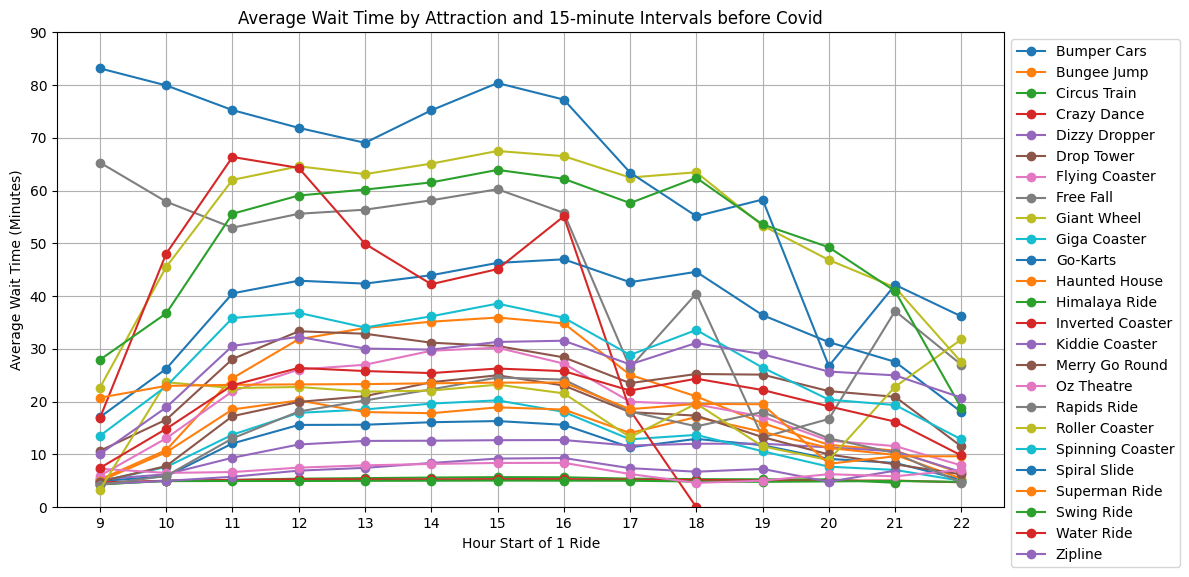

In [41]:
average_wait_time_by_attraction_and_time = df_15_avt.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()
selected_attractions = df_15_avt['ATTRACTION']
average_wait_time_by_attraction_and_time = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
average_wait_time_by_attraction_and_time.sort_values(['ATTRACTION', 'HOUR START OF 1 RIDE'], inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for attraction in average_wait_time_by_attraction_and_time['ATTRACTION'].unique():
    data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'] == attraction]
    plt.plot(data['HOUR START OF 1 RIDE'], data['WAIT TIME'], marker='o', linestyle='-', label=attraction)

plt.title('Average Wait Time by Attraction and 15-minute Intervals before Covid')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
plt.ylim(0, 90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(average_wait_time_by_attraction_and_time['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

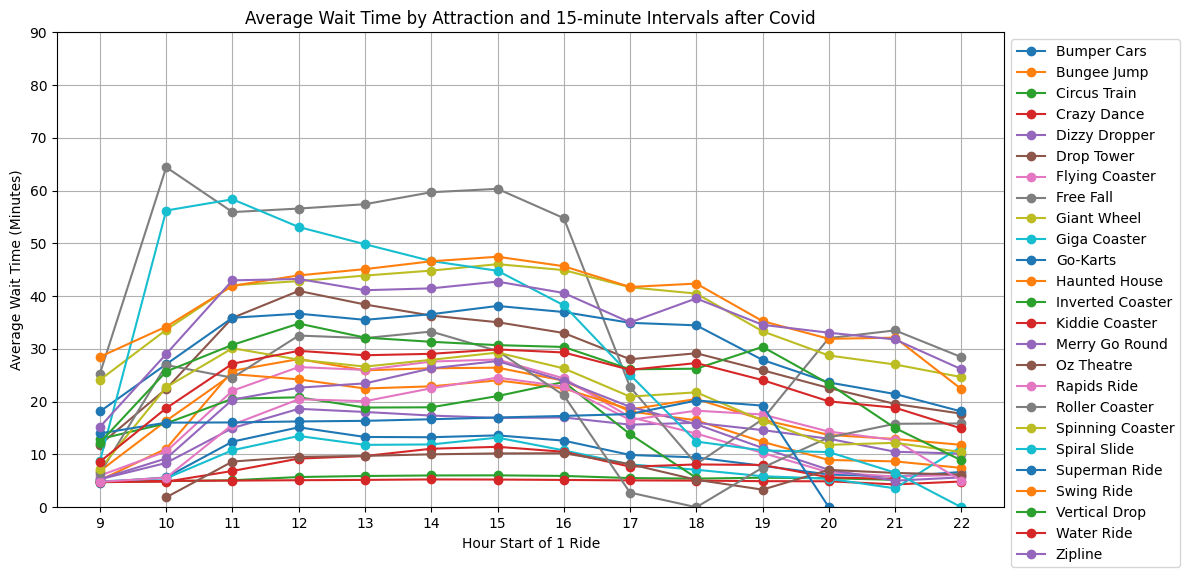

In [42]:
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()
selected_attractions = df_15_bis['ATTRACTION'].unique()[:40].tolist()
average_wait_time_by_attraction_and_time = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
average_wait_time_by_attraction_and_time.sort_values(['ATTRACTION', 'HOUR START OF 1 RIDE'], inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for attraction in average_wait_time_by_attraction_and_time['ATTRACTION'].unique():
    data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'] == attraction]
    plt.plot(data['HOUR START OF 1 RIDE'], data['WAIT TIME'], marker='o', linestyle='-', label=attraction)

plt.title('Average Wait Time by Attraction and 15-minute Intervals after Covid')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
plt.ylim(0, 90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(average_wait_time_by_attraction_and_time['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

In [43]:
df_15=merge_1
df_15['DATE'] = pd.to_datetime(df_15['DATE'])
df_15_all = df_15[(df_15['DATE'] < pd.Timestamp('2020-03-14')) | (df_15['DATE'] > pd.Timestamp('2021-06-30'))]
df_15_all = df_15_all[df_15_all['GUEST CARRIED'] != 0]
df_15_all = df_15_all[df_15_all['ATTENDANCE'] != 0]

df_15_all = df_15_all[df_15_all['ADJUST CAPACITY'] != 0]
df_15_all['Ratio People/Capacity'] =df_15_all['GUEST CARRIED']/df_15_all['ADJUST CAPACITY']
df_15_all = df_15_all[df_15_all['Ratio People/Capacity'] <= 1]

<ipython-input-43-545ff1bfbf04>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_15_all['Ratio People/Capacity'] =df_15_all['GUEST CARRIED']/df_15_all['ADJUST CAPACITY']


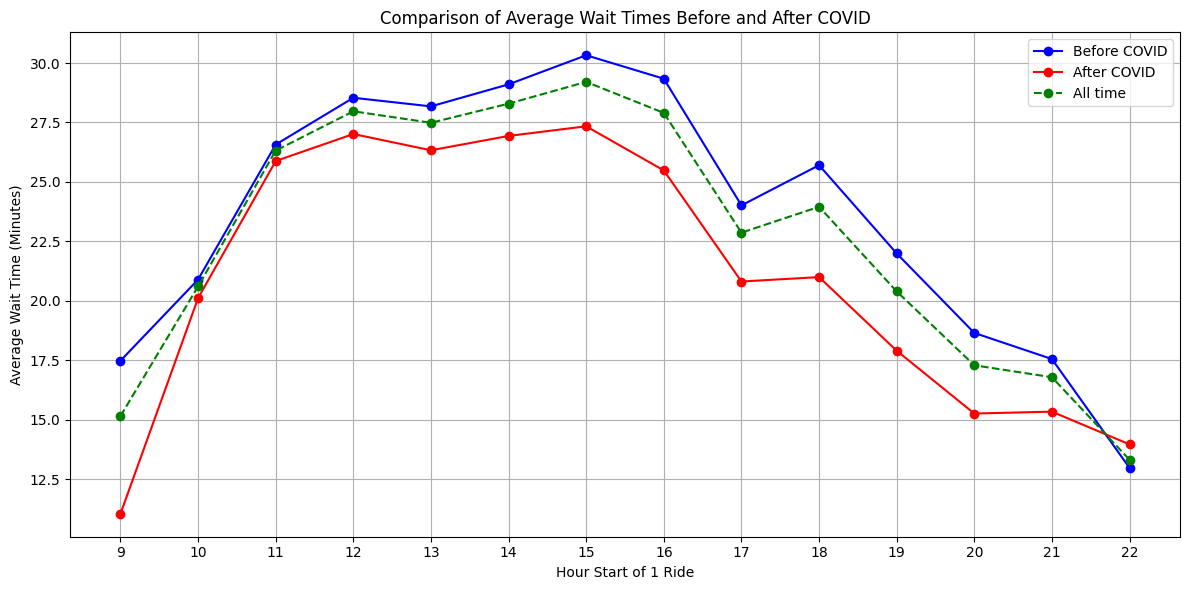

In [50]:
import matplotlib.pyplot as plt

# Compute the average wait time for each hour before and after COVID
average_wait_time_before = df_15_avt.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
average_wait_time_after = df_15_bis.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
average_wait_time_all = df_15_all.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))

plt.plot(average_wait_time_before['HOUR START OF 1 RIDE'],
         average_wait_time_before['WAIT TIME'],
         marker='o', linestyle='-', color='blue', label='Before COVID')

plt.plot(average_wait_time_after['HOUR START OF 1 RIDE'],
         average_wait_time_after['WAIT TIME'],
         marker='o', linestyle='-', color='red', label='After COVID')
plt.plot(average_wait_time_all['HOUR START OF 1 RIDE'],
         average_wait_time_all['WAIT TIME'],
         marker='o', linestyle='--', color='green', label='All time')

# Labels and title
plt.title('Comparison of Average Wait Times Before and After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')

plt.legend()
plt.grid(True)
plt.xticks(average_wait_time_before['HOUR START OF 1 RIDE'].unique())  # Use the X-axis from before COVID
plt.tight_layout()
plt.show()


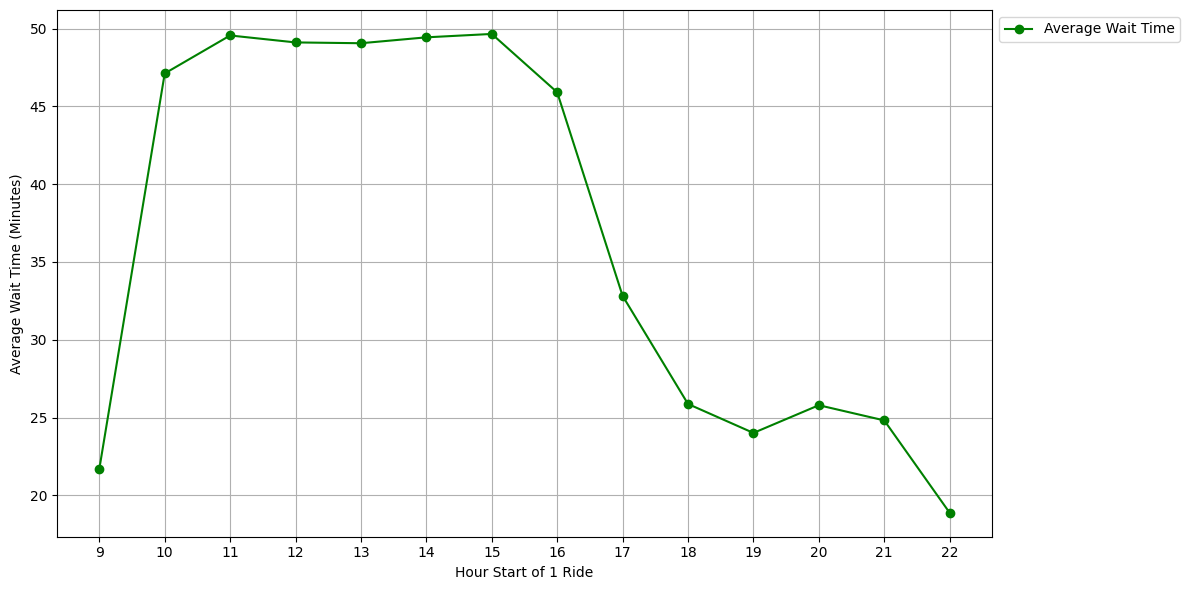

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by attraction and hour, then compute the mean wait time
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()

# Select the first 40 unique attractions
selected_attractions = ['Spiral Slide', 'Free Fall', 'Swing Ride', 'Giant Wheel']

# Filter data for selected attractions
filtered_data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]

# Compute the overall mean wait time across all selected attractions for each time interval
average_wait_time_overall = filtered_data.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_wait_time_overall['HOUR START OF 1 RIDE'],
         average_wait_time_overall['WAIT TIME'],
         marker='o', linestyle='-', color='green', label='Average Wait Time')

# Labels and title
#plt.title('Overall Average Wait Time of Most waited Attractions After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(average_wait_time_overall['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()


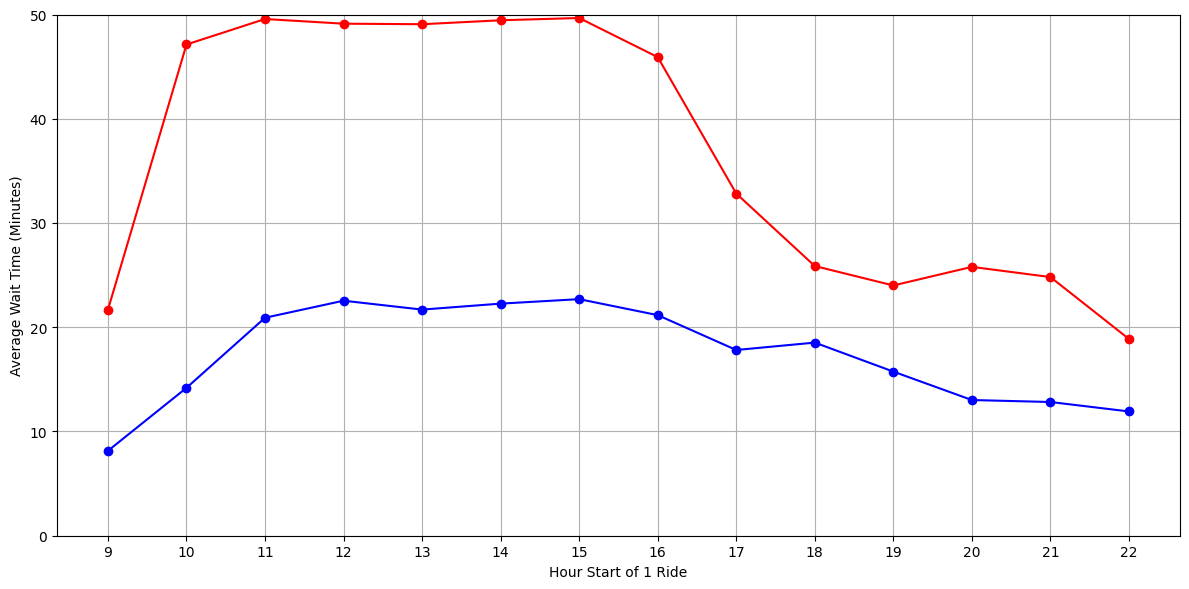

In [46]:

# Group by attraction and hour, then compute the mean wait time
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()

# Select the first 40 unique attractions
selected_attractions = ['Spiral Slide', 'Free Fall', 'Swing Ride', 'Giant Wheel']

# Filter data for selected attractions
filtered_data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
filtered_data_no = df_15_bis[~df_15_bis['ATTRACTION'].isin(selected_attractions)]
# Compute the overall mean wait time across all selected attractions for each time interval
average_wait_time_overall = filtered_data.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
average_wait_time_remaining = filtered_data_no.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_wait_time_overall['HOUR START OF 1 RIDE'],
         average_wait_time_overall['WAIT TIME'],
         marker='o', linestyle='-', color='red', label='Average Wait Time')


plt.plot(average_wait_time_remaining['HOUR START OF 1 RIDE'],
         average_wait_time_remaining['WAIT TIME'],
         marker='o', linestyle='-', color='blue', label='Average Wait Time (Other Attractions)')

# Labels and title
#plt.title('Overall Average Wait Time (Excluding Selected Attractions) After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.ylim(0, 50)
plt.xticks(average_wait_time_remaining['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

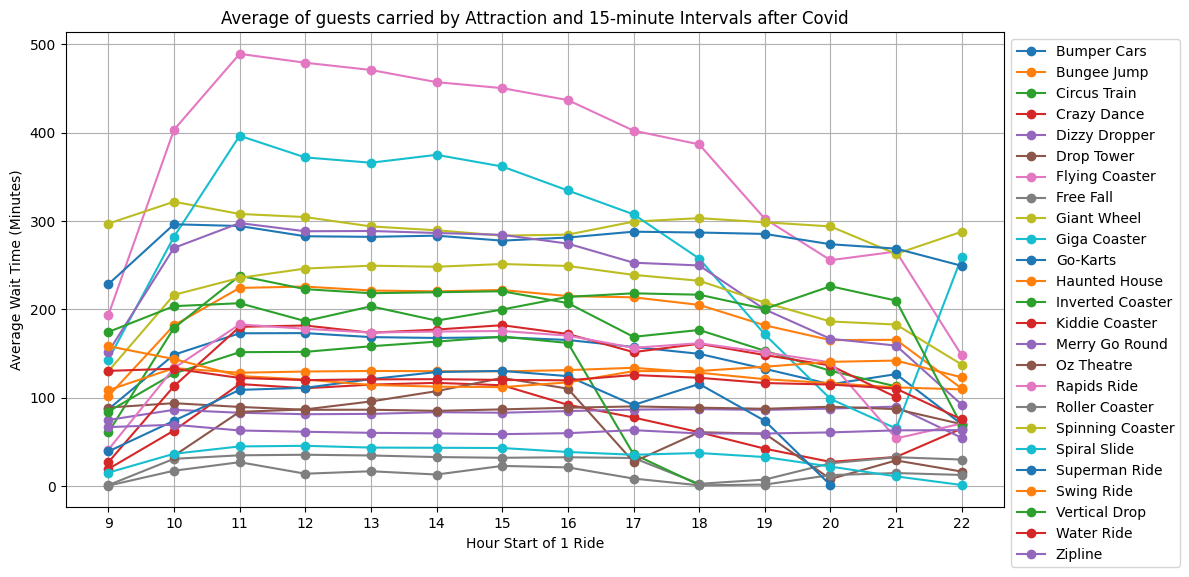

In [47]:
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['GUEST CARRIED'].mean().reset_index()
selected_attractions = df_15_bis['ATTRACTION']
average_wait_time_by_attraction_and_time = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
average_wait_time_by_attraction_and_time.sort_values(['ATTRACTION', 'HOUR START OF 1 RIDE'], inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for attraction in average_wait_time_by_attraction_and_time['ATTRACTION'].unique():
    data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'] == attraction]
    plt.plot(data['HOUR START OF 1 RIDE'], data['GUEST CARRIED'], marker='o', linestyle='-', label=attraction)

plt.title('Average of guests carried by Attraction and 15-minute Intervals after Covid')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(average_wait_time_by_attraction_and_time['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

In [48]:
from functools import reduce
rush_hour_df = df_15_bis[(df_15_bis['HOUR START OF 1 RIDE'] > 9) & (df_15_bis['HOUR START OF 1 RIDE'] < 17)]
capacity_analysis = rush_hour_df.groupby('ATTRACTION')['CAPACITY'].mean().reset_index()
capacity_analysis.sort_values(by = 'CAPACITY', inplace = True)

ratio_analysis = rush_hour_df.groupby('ATTRACTION')['Ratio People/Capacity'].mean().reset_index()
ratio_analysis.sort_values(by = 'Ratio People/Capacity', inplace = True)

average_wait_time_by_attraction = rush_hour_df.groupby('ATTRACTION')['WAIT TIME'].mean().reset_index()
average_wait_time_by_attraction.sort_values(by = 'WAIT TIME', inplace = True)

data_frames = [ratio_analysis, capacity_analysis, average_wait_time_by_attraction]
combined_analysis = reduce(lambda left, right: pd.merge(left, right, on='ATTRACTION'), data_frames)

combined_analysis.sort_values('WAIT TIME', ascending= False)

,ATTRACTION,Ratio People/Capacity,CAPACITY,WAIT TIME
12,Free Fall,0.554051,134.749000,58.441584
13,Spiral Slide,0.581226,75.000000,49.580770
8,Swing Ride,0.508732,242.250000,43.565815
22,Giant Wheel,0.659164,503.750000,42.577309
19,Zipline,0.616936,101.250000,40.187699
23,Go-Karts,0.679446,450.480921,35.303864
20,Drop Tower,0.634258,140.250000,34.594844
10,Vertical Drop,0.540462,411.250000,30.771277
1,Roller Coaster,0.368876,74.994896,28.591778
9,Water Ride,0.517085,244.439905,27.644330


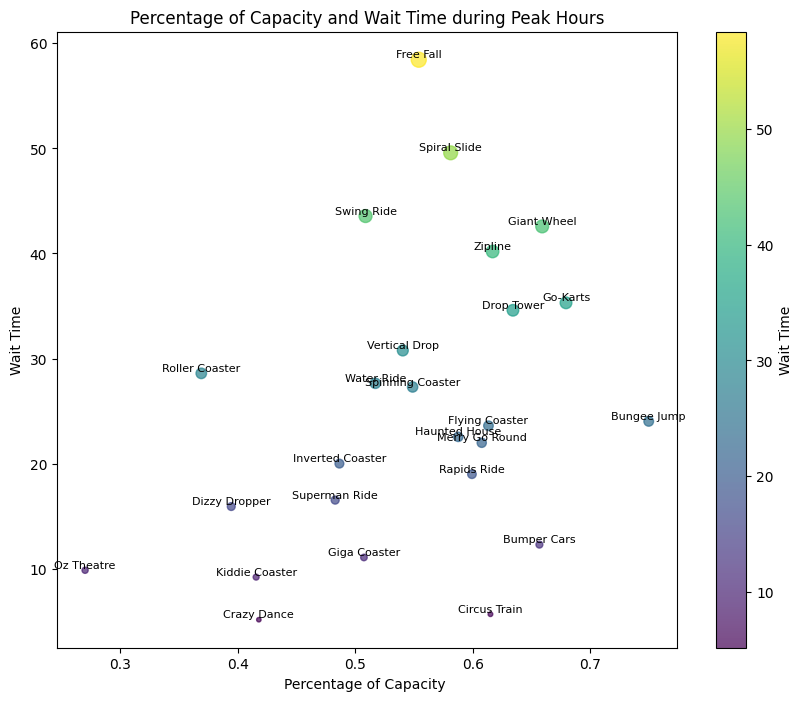

In [49]:
from sklearn.linear_model import LinearRegression

attraction_names = combined_analysis['ATTRACTION']
ratio_people_capacity = combined_analysis['Ratio People/Capacity']
wait_time = combined_analysis['WAIT TIME']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(ratio_people_capacity, wait_time, c=wait_time, cmap='viridis', s=wait_time*2, alpha=0.7)


plt.title('Percentage of Capacity and Wait Time during Peak Hours')
plt.xlabel('Percentage of Capacity ')
plt.ylabel('Wait Time')

cbar = plt.colorbar(scatter)
cbar.set_label('Wait Time')

texts = [plt.text(ratio_people_capacity[i], wait_time[i], txt, fontsize=8, ha='center', va='bottom') for i, txt in enumerate(attraction_names)]

plt.show()